In [1]:
!pip install git+https://github.com/openai/swarm.git
!pip install openai
!pip install firecrawl-py

  Cloning https://github.com/openai/swarm.git to /tmp/pip-req-build-nu896br_
  Running command git clone --filter=blob:none --quiet https://github.com/openai/swarm.git /tmp/pip-req-build-nu896br_
  Resolved https://github.com/openai/swarm.git to commit 9db581cecaacea0d46a933d6453c312b034dbf47
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import os
import openai
from firecrawl import FirecrawlApp
from swarm import Agent, Swarm
from openai import OpenAI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openai import ChatCompletion

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:172: UserWarning: Field name "schema" in "FirecrawlApp.ExtractParams" shadows an attribute in parent "BaseModel"
  warnings.warn(


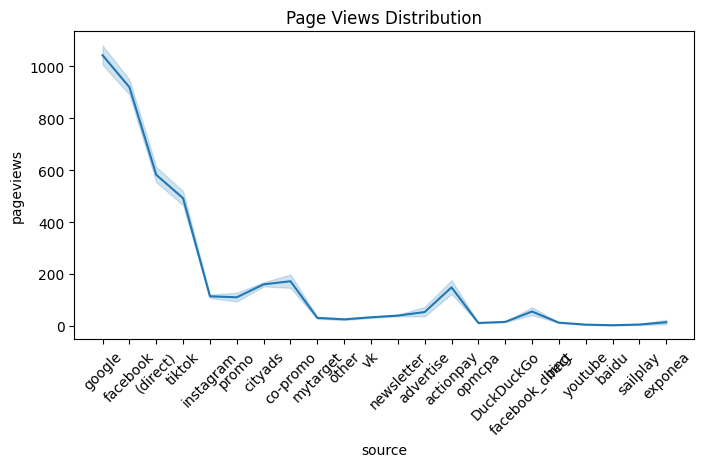

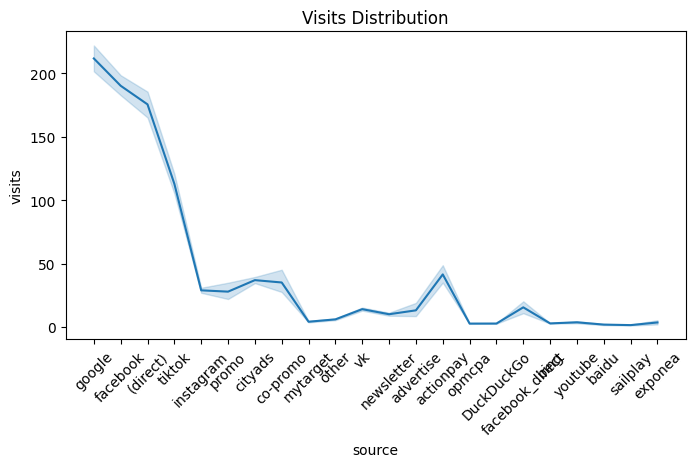

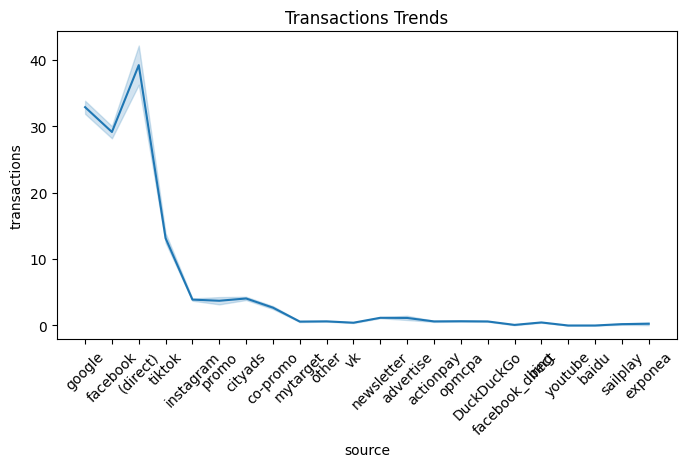

{'page_views_distribution': <Figure size 800x400 with 1 Axes>, 'visits_distribution': <Figure size 800x400 with 1 Axes>, 'transactions_trends': <Figure size 800x400 with 1 Axes>, 'product_click_trends': <Figure size 800x400 with 1 Axes>}


In [3]:
# Configure API Keys

os.environ["OPENAI_API_KEY"]= ""

#Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/jaydiaz2012/AI_First_Day_6_AI_Swarm/refs/heads/main/ai%20first%20sales%20data%20-%20sales_final(web).csv")

# Analyze dataset
def analyze_dataset():
    df['date'] = pd.to_datetime(df['date'])
    numerical_df = df.select_dtypes(include=np.number)

    summary = {
        "overview": df.describe(include="all").to_dict(),
        "null_values": df.isnull().sum().to_dict(),
        "correlations": numerical_df.corr().to_dict(),
    }
    return summary

def generate_web_insights():
    web_insights = {
        'source_pageviews': df.groupby('source')['pageviews'].sum(),
        'source_visits': df.groupby('source')['visits'].sum(),
        'source_transactions': df.groupby('source')['revenue'].sum(),
        'source_product_click': df.groupby('source')['ad spend'].sum()
    }
    return web_insights

def generate_web_visuals():
    visualizations = {}

    # Page Views Distribution
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="pageviews")
    plt.title("Page Views Distribution")
    plt.xticks(rotation=45)
    visualizations['page_views_distribution'] = plt.gcf()
    plt.show()

    # Visits Distribution
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="visits")
    plt.title("Visits Distribution")
    plt.xticks(rotation=45)
    visualizations['visits_distribution'] = plt.gcf()
    plt.show()

    # Transactions Trends
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="transactions")
    plt.title("Transactions Trends")
    plt.xticks(rotation=45)
    visualizations['transactions_trends'] = plt.gcf()
    plt.show()

    # Product Click Trends
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="productClick")
    plt.title("Product Clicks Trends")
    plt.xticks(rotation=45)
    visualizations['product_click_trends'] = plt.gcf()
    plt.close()

    return visualizations

result = generate_web_visuals()
print(result)

In [ ]:
web_analytics_agent = Agent(
    name="Web Analyst Agent",
    model="gpt-4o-mini",
    instructions="""You are a web analyst agent that cleans the dataset and report on the statistical summary of the dataset.""",
    functions=[analyze_dataset],
)

web_insights_agent = Agent(
    name="Web Insights Agent",
    model="gpt-4o-mini",
    instructions="""You are a Web Insights Agent that provide insights about the data provided and summarize the insights from other agents, including actionable recommendations.""",
    functions=[generate_web_insights]
)

web_insights_visuals_agent = Agent(
    name="Web_Visuals_Agent",
    model="gpt-4o-mini",
    instructions="""You are a data visualization expert that create visualizations on a given datase and gives summary of the data visuals.""",
    fuctions=[generate_web_visuals]
)

if __name__ == "__main__":
    client = Swarm()

    web_analytics_response = client.run(
        agent=web_analytics_agent,
        messages=[{
            "role": "user",
            "content": "Please clean and analyze my dataset."
        }]
    )

    print("\nWeb Analytics Results:")
    print(web_analytics_response.messages[-1]["content"])

    web_insights_response = client.run(
        agent=web_insights_agent,
        messages=[{
            "role": "user",
            "content": "Please provide insights based from my dataset."
        }]
    )

    print("\nWeb Insights Results:")
    print(web_insights_response.messages[-1]["content"])

    web_insights_visuals_response = client.run(
        agent=web_insights_visuals_agent,
        messages=[{
            "role": "user",
            "content": "Please provide charts using the data from the given dataset."
        }]
    )

    print("\nWeb Analytics Visuals Results:")
    print(web_insights_visuals_response.messages[-1]["content"])


Web Analytics Results:
Here's a summary of the cleaned dataset and its statistical analysis:

### Overview of the Dataset
- **Total Count of Records**: 52,721

#### Key Features:
1. **Date**
   - Count: 52,721
   - Mean: 2020-05-19 14:22:09
   - Min: 2020-01-01
   - Max: 2020-09-30

2. **Source**
   - Unique Values: 22
   - Most Frequent Source: "facebook" (12,954 occurrences)

3. **Medium**
   - Unique Values: 6
   - Most Frequent Medium: "cpc" (16,833 occurrences)

4. **Delivery Available**
   - Unique Values: 3
   - Most Frequent: "no data" (31,953 occurrences)

5. **Device Type**
   - Unique Values: 3
   - Most Frequent Type: "mobile" (24,416 occurrences)

6. **Promo Activated**
   - Unique Values: 2
   - Most Frequent: "no" (27,548 occurrences)

7. **Filter Used**
   - Unique Values: 2
   - Most Frequent: "no" (37,290 occurrences)

8. **Pageviews**
   - Mean: 583.76
   - Min: 0
   - Max: 34,832

9. **Visits**
   - Mean: 127.12
   - Min: 1
   - Max: 6,975

10. **Product Clicks**
 

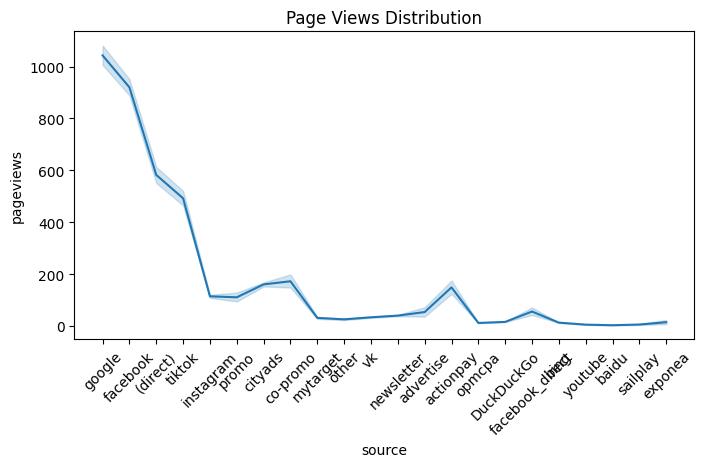

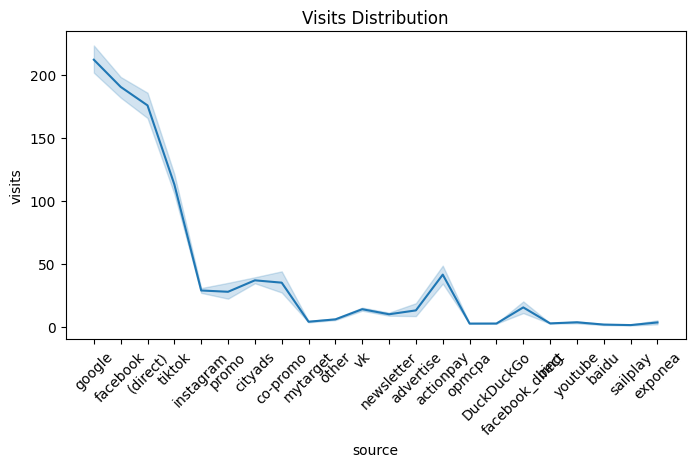

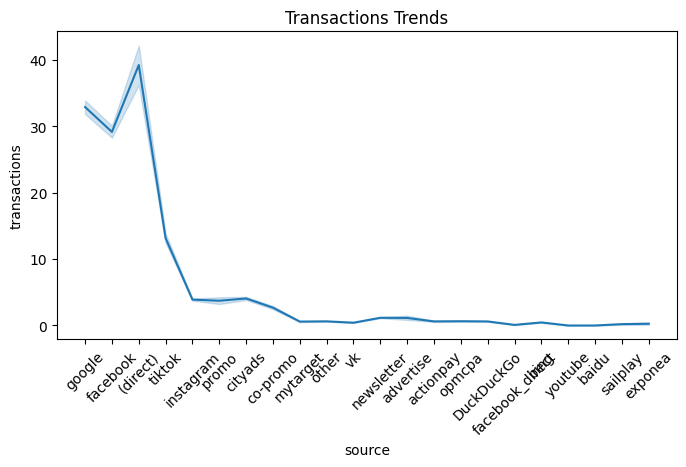

Analysis complete. Visualizations and report generated.


In [25]:
# Modify the function definition to accept the dataframe
def generate_web_insights(df):
    web_insights = {
        'source_pageviews': df.groupby('source')['pageviews'].sum(),
        'source_visits': df.groupby('source')['visits'].sum(),
        'source_transactions': df.groupby('source')['revenue'].sum(),
        'source_product_click': df.groupby('source')['ad spend'].sum()
    }
    return web_insights

# Modify the function definition to accept the dataframe
def generate_web_visuals(df):
    visualizations = {}

    # Page Views Distribution
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="pageviews")
    plt.title("Page Views Distribution")
    plt.xticks(rotation=45)
    visualizations['page_views_distribution'] = plt.gcf()
    plt.show()

    # Visits Distribution
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="visits")
    plt.title("Visits Distribution")
    plt.xticks(rotation=45)
    visualizations['visits_distribution'] = plt.gcf()
    plt.show()

    # Transactions Trends
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="transactions")
    plt.title("Transactions Trends")
    plt.xticks(rotation=45)
    visualizations['transactions_trends'] = plt.gcf()
    plt.show()

    # Product Click Trends
    plt.figure(figsize=(8, 4))
    sns.lineplot(df, x="source", y="productClick")
    plt.title("Product Clicks Trends")
    plt.xticks(rotation=45)
    visualizations['product_click_trends'] = plt.gcf()
    plt.close()

    return visualizations

def generate_insights(summary, client): # add client as an argument
    response = client.chat.completions.create( # Now client is accessible
        model="gpt-4o-mini",
        temperature=0.1,
        messages=[
            {"role": "system", "content": "You are a web analytics expert."},
            {"role": "user", "content": f"{summary}\n\n"
                                      "Generate actionable business insights from the above dataset."
            }
        ]
    )
    return response.choices[0].message.content

# Generate a report
def generate_report(insights, save_path="report1.txt"):
    with open(save_path, "w") as file:
        file.write("Automated Business Insights Report\n")
        file.write("=" * 50 + "\n\n")
        file.write(insights)
        file.write("\n" + "=" * 50)

def main():
    # Analyze dataset
    # The function generate_web_insights is modified to accept the dataframe as an argument.
    summary = generate_web_insights(df)

    # Visualize data
    # The function generate_web_visuals is modified to accept the dataframe as an argument.
    generate_web_visuals(df)

    # Generate insights
    OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
    client = OpenAI(api_key=OPENAI_API_KEY)
    insights = generate_insights(summary, client)

    # Generate report
    generate_report(insights, save_path="report1.txt") # Calling the outer generate_report

    print("Analysis complete. Visualizations and report generated.")

if __name__ == "__main__":
    main()